Tracking element #1 (s = 0 m, SourceBasic, stage 0)
Tracking element #2 (s = 0.1 m, DriftBasic, stage 0)
Tracking element #3 (s = 0.6 m, StageBasic, stage 1)
Tracking element #4 (s = 0.8 m, DriftBasic, stage 1)
Tracking element #5 (s = 1.8 m, QuadrupoleHor, stage 1)
Tracking element #6 (s = 3.03 m, DriftBasic, stage 1)
Tracking element #7 (s = 4.03 m, QuadrupoleVer, stage 1)
Tracking element #8 (s = 5.25 m, DriftBasic, stage 1)
Tracking element #9 (s = 6.25 m, QuadrupoleHor, stage 1)
Tracking element #10 (s = 9.77 m, DriftBasic, stage 1)
Tracking element #11 (s = 10.75 m, DipoleSpectrometerBasic, stage 1)
Tracking element #12 (s = 19.58 m, DriftBasic, stage 1)


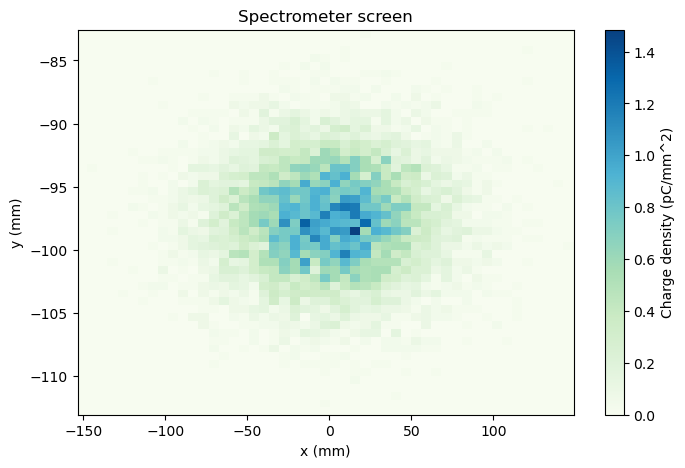

In [1]:
import sys
sys.path.append('../')
from opal import SourceBasic, StageBasic, BeamDeliverySystemFACET2Basic, SpectrometerFACET2Basic, Experiment

# define beam
source = SourceBasic()
source.L = 0 # [m]
source.Q = -1e-9 # [C]
source.E0 = 10e9 # [eV]
source.sigE = 0.01*source.E0 # [eV]
source.sigz = 10e-6 # [m]
source.z = -100e-6 # [m]
source.emitnx = 5e-6 # [m rad]
source.emitny = 2e-6 # [m rad]
source.betax = 20e-3 # [m]
source.betay = source.betax
source.Npart = 10000

# define beamline
bds = BeamDeliverySystemFACET2Basic()
bds.beta_waist = 0.05 # [m]
bds.s_waist = 0 # [m]

# define stage
stage = StageBasic()
stage.deltaE = 4e9 # [eV]
stage.L = 0.5 # [m]
#stage.n0 = 1e22 # [m^-3]
#stage.kRb = 2.5

# define spectrometer
spectrometer = SpectrometerFACET2Basic()
spectrometer.B_dip = 0.5 # [T]

# define experiment
experiment = Experiment(source, bds, stage, spectrometer)
beam = experiment.run("FACET-II")

# see output
experiment.plotSpectrometerScreen()
#beam.plotLPS()